In [95]:
%matplotlib inline
import os
import pandas as pd
import wbdata

In [160]:
from datetime import datetime, date, timedelta
import matplotlib as mpl
import dateutil
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import seaborn as sns
import locale
import pandas as pd
import requests
from pandas import ExcelWriter
import numpy as np

sns.set(style='ticks')
# pal = sns.color_palette([
#     [31 / 255, 73 / 255, 125 / 255], #JPMBlue
#     [247 / 255, 150 / 255, 70 / 255], #JPMOrange
#     [155 / 255, 187 / 255, 89 / 255] #JPMGreen
# ])

pal = sns.color_palette([
    [222 / 255, 110 / 255, 116 / 255], #JPMBlue
    [101 / 255, 134 / 255, 194 / 255], #JPMOrange
    [43 / 255, 175 / 255, 100 / 255], #JPMGreen
        [224 / 255, 120 / 255, 57 / 255], #Orange
        [205 / 255, 51 / 255, 60 / 255], #Red
        [0 / 255, 162 / 255, 88 / 255], #Green
        [51 / 255, 103 / 255, 171 / 255], #Blue
])

linestyles = [
    {'c': pal[0], 'linestyle': '-'}, 
    {'c': pal[1], 'linestyle': '-'}, 
    {'c': pal[0], 'linestyle': 'dashed'}, 
    {'c': pal[1], 'linestyle': 'dashed'}, 
    {'c': pal[0], 'linestyle': ':'}, 
    {'c': pal[1], 'linestyle': ':'}, 
    {'c': pal[2], 'linestyle': '-'}, 
    {'c': pal[2], 'linestyle': 'dashed'}, 
    {'c': pal[2], 'linestyle': ':'}, 
    
]

barstyles = [
    {'color': pal[0], },
    {'color': pal[0], },
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    
]

rcParams = {
    'font.family' : 'sans-serif',
    'font.sans-serif' : 'Arial',
    'font.weight' : 'bold',
    'font.stretch' : 'condensed',
    'figure.autolayout' : False,
    'hatch.linewidth' : 0.2
}

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
# Plantagenet Cherokee

# CHARTDIR
SAVEFIG_KWARGS = {'dpi': 72*4}
LEGEND_KWARGS = {'frameon': True, 'framealpha': 0.9, 'labelspacing': 0.4}
CHART_GAP = timedelta(days=20)
CHART_TITLE_ALIGN = 'left'
# x_min = datetime(2020,2,15)
x_min = datetime(2016,1,1)
x_max = date.today() + CHART_GAP
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 370,
    dtstart = x_min,
    until = x_max,
)
# yearsFmt = mdates.DateFormatter('%b-%Y')
# yearsFmt = mdates.DateFormatter('%b-%d')
yearsFmt = mdates.DateFormatter('%Y')
fontsize = 15
fontweight = 'regular'
title_fontsize = 15
title_fontweight = 'regular'
tick_label_size = 15
tick_label_weight = 'regular'
legend_title_fontsize = 15
legend_title_fontweight = 'regular'
legend_label_fontsize = 15
legend_label_fontweight = 'regular'

annotation_fontsize = 15
annotation_fontweight = 'regular'
xticks_params = {
    'pad' : 1,
    'length' : 3,
}
yticks_params = {
    'pad' : 2,
    'length' : 2,
}

savefig_params = {
    'bbox_inches' : 'tight',
    'pad_inches' : 0.4,
}
xlabel_params = {
    'position' : (0.5,0.5),
    'fontsize' : 15,
    'fontweight' : 'regular',
    'labelpad': None,
}
ylabel_params = {
    'fontsize' : 15,
    'fontweight' : 'regular',
}

footnote_params = {
    'xy': (0,-0.15),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}

footnote_fontsize = 15
footnote_fontweight = 'regular'
fontname = "Baskerville"
def apply_to_axes(axes, footnote_text = 'AllStuffData'):
    _axes = (axes,) if not isinstance(axes, tuple) else axes
    for ax in axes:
        ax.xaxis.label.set_fontsize(xlabel_params['fontsize'])
        ax.yaxis.label.set_fontsize(ylabel_params['fontsize'])
        for item in [ax.xaxis.label, ax.yaxis.label]:
            item.set_fontweight(fontweight)
            item.set_fontname(fontname)
        
        ax.title.set_fontsize(title_fontsize)
        ax.title.set_fontweight(title_fontweight)
        ax.title.set_fontname(fontname)
        
        for item in ax.get_xticklabels() + ax.get_yticklabels():
            item.set_fontsize(tick_label_size)
            item.set_fontweight(tick_label_weight)
            item.set_fontname(fontname)
            
        if ax.get_legend() is not None:
            lt = ax.get_legend().get_title()
            lt.set_fontsize(legend_title_fontsize)
            lt.set_fontweight(legend_title_fontweight)
            lt.set_fontname(fontname)
            t0 = ax.get_legend().get_texts()[0]
            t0.set_fontsize(legend_label_fontsize)
            t0.set_fontweight(legend_label_fontweight)
            t0.set_fontname(fontname)
        
        footnote = ax.annotate(footnote_text, **footnote_params)
        footnote.set_fontsize(footnote_fontsize)
        footnote.set_fontname(fontname)
        footnote.set_fontweight(footnote_fontweight)
        
    return axes

In [23]:
import time
from selenium import webdriver
from selenium.webdriver.support.ui import Select

In [47]:
dfs=[]
for year in list(range(1997,2020)):
    driver.get("https://commerce-app.gov.in/eidb/ecntq.asp")
    select = Select(driver.find_element_by_xpath('//*[@id="select2"]'))
    select.select_by_value(str(year))
    driver.find_element_by_xpath('//*[@id="radiousd"]').click()
    driver.find_element_by_xpath('//*[@id="button1"]').click()
    html_source = driver.page_source
    df = pd.read_html(html_source)[0]
    df = df.iloc[:,[1,4]]
    df = df.set_index('Country')
    df.columns = [str(year)]
    dfs.append(df)

In [75]:
df = pd.concat(dfs, axis=1)
df.to_pickle('Exports.pkl')
df.loc['Percent'] = (df.loc['CHINA P RP'] / df.loc["India's Total Export"]) * 100
df = df.loc[['CHINA P RP','Percent'],:].T
df.index = pd.to_datetime(df.index)
df = df.reset_index()
df['index'] = df['index'].dt.to_period(freq='D')
df = df.set_index('index')
df.columns = ['Total Export (US$)',"Percent of India's Total Export"]
df_export = df

/Users/gopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [81]:
dfs=[]
for year in list(range(1997,2020)):
    driver.get("https://commerce-app.gov.in/eidb/icntq.asp")
    select = Select(driver.find_element_by_xpath('//*[@id="select2"]'))
    select.select_by_value(str(year))
    driver.find_element_by_xpath('//*[@id="radiousd"]').click()
    driver.find_element_by_xpath('//*[@id="button1"]').click()
    html_source = driver.page_source
    df = pd.read_html(html_source)[0]
    df = df.iloc[:,[1,4]]
    df = df.set_index('Country')
    df.columns = [str(year)]
    dfs.append(df)

In [82]:
df = pd.concat(dfs, axis=1)
df.to_pickle('Imports.pkl')
df.loc['Percent'] = (df.loc['CHINA P RP'] / df.loc["India's Total Import"]) * 100
df = df.loc[['CHINA P RP','Percent'],:].T
df.index = pd.to_datetime(df.index)
df = df.reset_index()
df['index'] = df['index'].dt.to_period(freq='D')
df = df.set_index('index')
df.columns = ['Total Import (US Mil$)',"Percent of India's Total Import"]
df_import = df

/Users/gopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [142]:
df = pd.concat([df_export,df_import], axis=1)
df = df.rename(columns={"Total Export (US$)": "Total Export (US Mil$)"})
df['Trade Deficit (US Mil$)'] = df['Total Import (US Mil$)'] - df['Total Export (US Mil$)']
df.head()

,Total Export (US Mil$),Percent of India's Total Export,Total Import (US Mil$),Percent of India's Total Import,Trade Deficit (US Mil$)
index,,,,,
1997-01-01,717.95,2.063966,1112.05,2.680640,394.10
1998-01-01,427.16,1.285901,1096.71,2.587269,669.55
1999-01-01,539.04,1.463888,1282.89,2.579292,743.85
2000-01-01,831.30,1.865562,1502.20,2.972508,670.90
2001-01-01,951.95,2.172077,2036.39,3.960825,1084.44


In [163]:
x_min = datetime(1997,1,1)
x_max = date.today() + timedelta(days=367)
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 367*3,
    dtstart = x_min,
    until = x_max,
)
yearsFmt = mdates.DateFormatter('%Y')
footnote_params = {
    'xy': (0,-0.09),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}

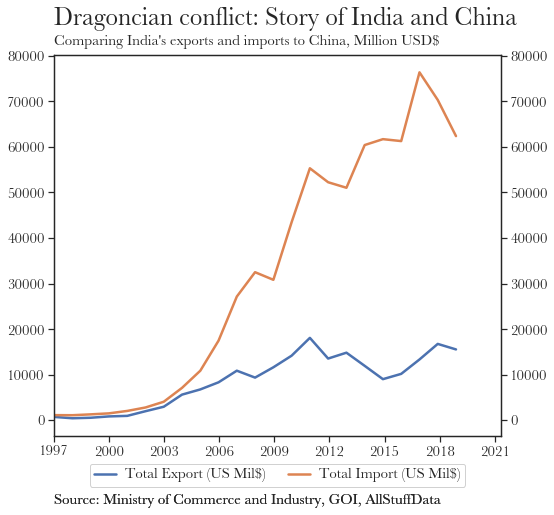

In [164]:
df1 = df[['Total Export (US Mil$)','Total Import (US Mil$)']]
fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)
# ax.axhline(linewidth=0.5 , color='black', zorder=1)
ax.set_xticks([_ for _ in tickrule])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Dragoncian conflict: Story of India and China', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Comparing India's exports and imports to China, Million USD$",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: Ministry of Commerce and Industry, GOI, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-09/tuesday_01.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

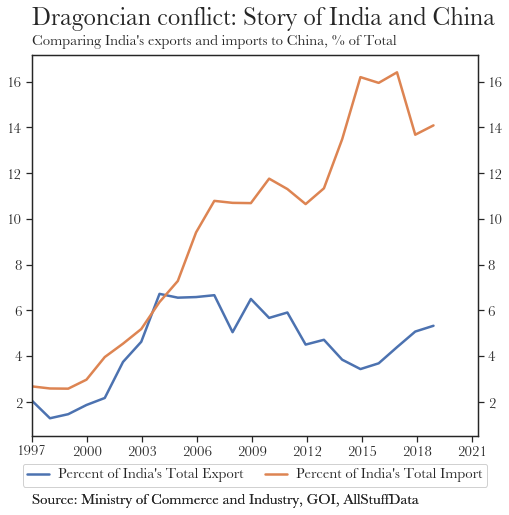

In [165]:
df1 = df[["Percent of India's Total Export","Percent of India's Total Import"]]
fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)
# ax.axhline(linewidth=0.5 , color='black', zorder=1)

ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Dragoncian conflict: Story of India and China', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Comparing India's exports and imports to China, % of Total",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: Ministry of Commerce and Industry, GOI, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-09/tuesday_02.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [ ]:
x_min = datetime(1997,1,1)
x_max = date.today() + timedelta(days=367)
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 367*3,
    dtstart = x_min,
    until = x_max,
)
yearsFmt = mdates.DateFormatter('%Y')
footnote_params = {
    'xy': (0,-0.09),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}

In [180]:
df1 = df[['Trade Deficit (US Mil$)']]
df1 = df1.reset_index()
df1['Year'] = df1['index'].dt.year
df1 = df1[['Year','Trade Deficit (US Mil$)']]
df1 = df1.set_index('Year')
df1

,Trade Deficit (US Mil$)
Year,
1997,394.10
1998,669.55
1999,743.85
2000,670.90
2001,1084.44
2002,816.56
2003,1098.13
2004,1482.10
2005,4108.95


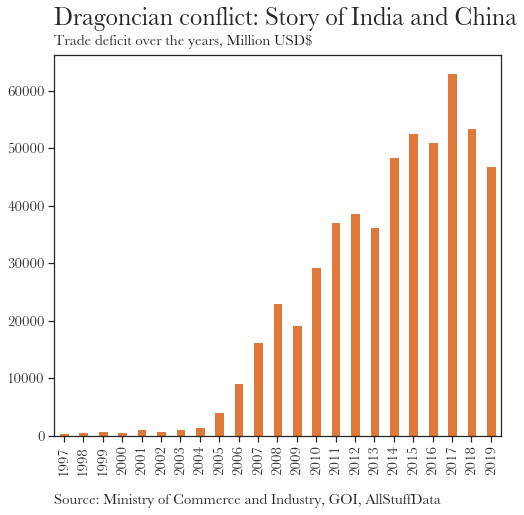

In [182]:
fig, ax = plt.subplots(figsize=(8,7))

ax = df1.plot.bar(ax=ax, legend=False, color = pal[3])
ax.set_title('Dragoncian conflict: Story of India and China', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
# ax.set_color('orange')
fig.text(0.125,0.9,"Trade deficit over the years, Million USD$",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax.set_xlabel("")
# ax.set_xticks([_ for _ in tickrule])
footnote_text = "Source: Ministry of Commerce and Industry, GOI, AllStuffData"
ax.get_legend().remove()
# ax.get_xaxis().set_visible(False)
apply_to_axes((ax,ax1),footnote_text = footnote_text)

# ax.xaxis_date()     # interpret the x-axis values as dates
# fig.autofmt_xdate()
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-09/monday_03.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [206]:
countries = ['IND','CHN']
indicators = {
    "NY.GDP.MKTP.CD": "GDP (current US$)", 
    "NY.GDP.MKTP.KD.ZG": "GDP growth (annual %)",
    "NY.GDP.MKTP.PP.CD": "GDP, PPP (current international $)",
}
df = wbdata.get_dataframe(indicators, country=countries, convert_date=True)
df = df.reset_index()

In [229]:
# wbdata.search_indicators("gdp")

In [221]:
df1 = df[['country','date','GDP (current US$)']]
df1 = df1.pivot_table(index='date',columns='country',values='GDP (current US$)')
df1.columns.name = None
df1 = df1.reset_index()
df1['date'] = df1['date'].dt.to_period(freq='D')
df1 = df1.set_index('date')
df1 = (df1/ 1000000000000)

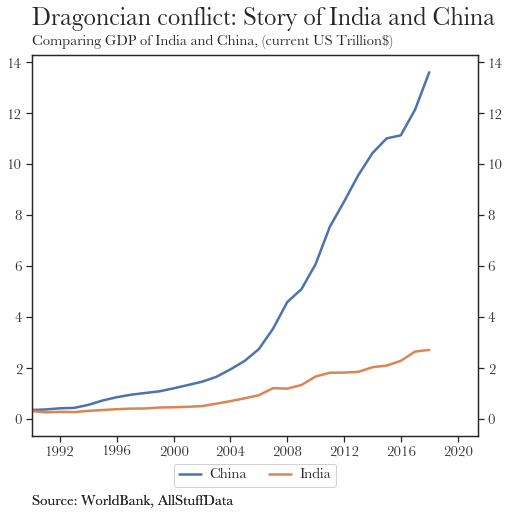

In [222]:
# df1 = df[["Percent of India's Total Export","Percent of India's Total Import"]]
fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)
# ax.axhline(linewidth=0.5 , color='black', zorder=1)

ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Dragoncian conflict: Story of India and China', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Comparing GDP of India and China, (current US Trillion$)",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: WorldBank, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-09/monday_04.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [224]:
df2 = df[['country','date','GDP growth (annual %)']]
df2 = df2.pivot_table(index='date',columns='country',values='GDP growth (annual %)')
df2.columns.name = None
df2 = df2.reset_index()
df2['date'] = df2['date'].dt.to_period(freq='D')
df2 = df2.set_index('date')
df1 = df2

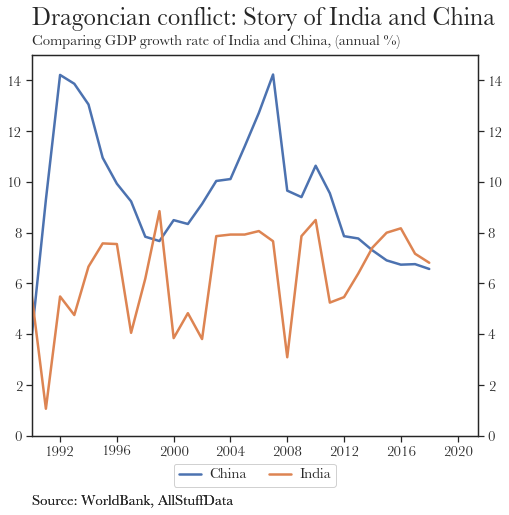

In [226]:
# df1 = df[["Percent of India's Total Export","Percent of India's Total Import"]]
fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)
# ax.axhline(linewidth=0.5 , color='black', zorder=1)
# ax.set_yticks([-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1])
# ax1.set_yticks([-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1])
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax.set_ylim(0,15)
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Dragoncian conflict: Story of India and China', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Comparing GDP growth rate of India and China, (annual %)",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: WorldBank, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-09/monday_05.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [232]:
df3 = df[['country','date','GDP per capita, PPP (current international $)']]
df3 = df3.pivot_table(index='date',columns='country',values='GDP per capita, PPP (current international $)')
df3.columns.name = None
df3 = df3.reset_index()
df3['date'] = df3['date'].dt.to_period(freq='D')
df3 = df3.set_index('date')
df1 = df3
df1 = df1/1000000000000
# df3.plot.line()

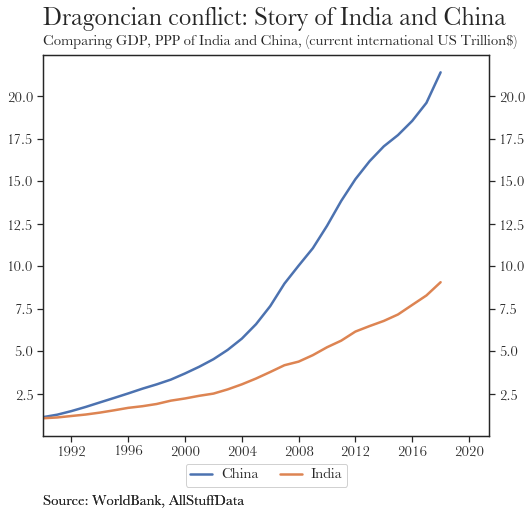

In [233]:
# df1 = df[["Percent of India's Total Export","Percent of India's Total Import"]]
fig, ax = plt.subplots(figsize=(8,7))
for i, item in enumerate(list(df1.columns)):
    df_ = df1[[item]]
    mask = df_[item].notnull()
    ax.plot(df_.index[mask].start_time.values, df_[item][mask], label = item, linewidth=2.5, zorder = 2)
# ax.axhline(linewidth=0.5 , color='black', zorder=1)

ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim([mdates.date2num(x_min),mdates.date2num(x_max)])
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax.set_title('Dragoncian conflict: Story of India and China', loc=CHART_TITLE_ALIGN, fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"Comparing GDP, PPP of India and China, (current international US Trillion$)",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
footnote_text = "Source: WorldBank, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-09/monday_06.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [315]:
x_min = datetime(1990,1,1)
x_max = date.today() + timedelta(days=367)
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 367*3,
    dtstart = x_min,
    until = x_max,
)
yearsFmt = mdates.DateFormatter('%Y')
footnote_params = {
    'xy': (0,-0.05),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,0),
    'ncol': 3,
}

In [307]:
trade_2018 = {
    'china_import': [18850036, 2134982615 ],
    'china_export': [76880637, 2494230195],
    'india_import': [90398344, 617945604 ],
    'india_export': [16365815, 322291568],
}

In [308]:
trade_2018 = {
    'china_import': [0.88, 100 ],
    'china_export': [3.08, 100],
    'india_import': [14.63, 100],
    'india_export': [5.08, 100],
}

In [309]:
df = pd.DataFrame(trade_2018)
# df

In [310]:
# plot = df.plot.pie(y='china_import', figsize=(5, 5),autopct='%1.1f%%', pctdistance=1.2)

/Users/gopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/gopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


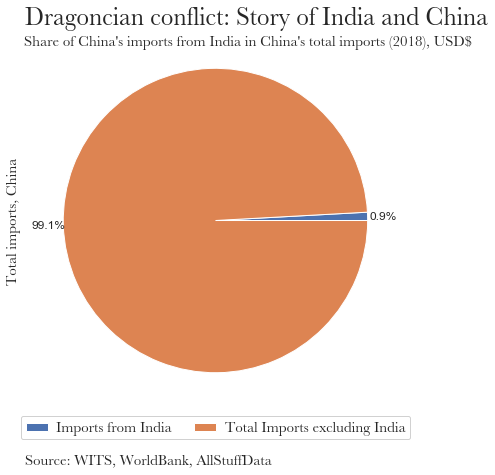

In [321]:
df1= df[['china_import']]
your_list = ['Imports from India', 'Total Imports excluding India',]
df1['name'] = pd.DataFrame(your_list)
df1 = df1.set_index('name')
df1.columns = ["Total imports, China"]
fig, ax = plt.subplots(figsize=(8,7))
ax = df1.plot.pie(ax=ax, y="Total imports, China", autopct='%1.1f%%', labels=['',''], labeldistance=None, pctdistance=1.1)
ax.set_title('Dragoncian conflict: Story of India and China', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=0 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs,labels=df1.index)
fig.text(0.18,0.85,"Share of China's imports from India in China's total imports (2018), USD$",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})

footnote_text = "Source: WITS, WorldBank, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-09/monday_07.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

/Users/gopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


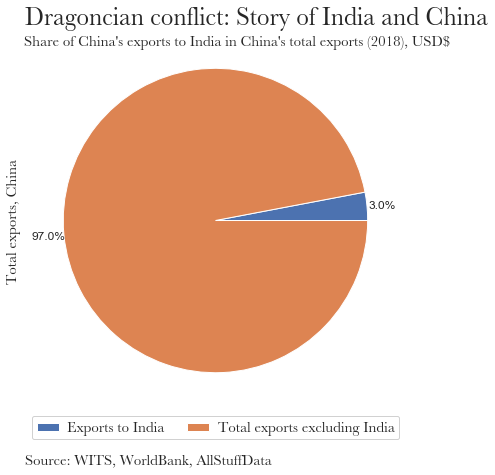

In [322]:
df1= df[['china_export']]
your_list = ['Exports to India', 'Total exports excluding India',]
df1['name'] = pd.DataFrame(your_list)
df1 = df1.set_index('name')
df1.columns = ["Total exports, China"]
fig, ax = plt.subplots(figsize=(8,7))
ax = df1.plot.pie(ax=ax, y="Total exports, China", autopct='%1.1f%%', labels=['',''], labeldistance=None, pctdistance=1.1)
ax.set_title('Dragoncian conflict: Story of India and China', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=0 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs,labels=df1.index)
fig.text(0.18,0.85,"Share of China's exports to India in China's total exports (2018), USD$",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})

footnote_text = "Source: WITS, WorldBank, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-09/monday_08.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

/Users/gopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


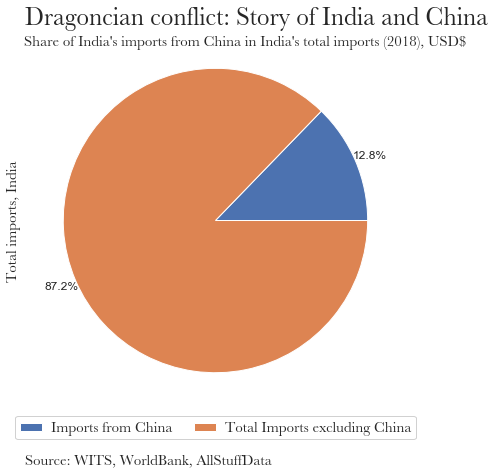

In [323]:
df1= df[['india_import']]
your_list = ['Imports from China', 'Total Imports excluding China',]
df1['name'] = pd.DataFrame(your_list)
df1 = df1.set_index('name')
df1.columns = ["Total imports, India"]
fig, ax = plt.subplots(figsize=(8,7))
ax = df1.plot.pie(ax=ax, y="Total imports, India", autopct='%1.1f%%', labels=['',''], labeldistance=None, pctdistance=1.1)
ax.set_title('Dragoncian conflict: Story of India and China', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=0 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs,labels=df1.index)
fig.text(0.18,0.85,"Share of India's imports from China in India's total imports (2018), USD$",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})

footnote_text = "Source: WITS, WorldBank, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-09/monday_09.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

/Users/gopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


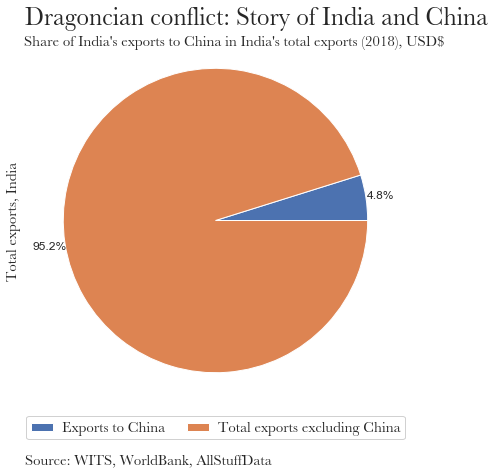

In [324]:
df1= df[['india_export']]
your_list = ['Exports to China', 'Total exports excluding China',]
df1['name'] = pd.DataFrame(your_list)
df1 = df1.set_index('name')
df1.columns = ["Total exports, India"]
fig, ax = plt.subplots(figsize=(8,7))
ax = df1.plot.pie(ax=ax, y="Total exports, India", autopct='%1.1f%%', labels=['',''], labeldistance=None, pctdistance=1.1)
ax.set_title('Dragoncian conflict: Story of India and China', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=0 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs,labels=df1.index)
fig.text(0.18,0.85,"Share of India's exports to China in India's total exports (2018), USD$",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})

footnote_text = "Source: WITS, WorldBank, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-09/monday_10.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)